In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("/content/API_BRA_DS2_en_excel_v2_31904.xls", sheet_name = 0, skiprows=3)

In [ ]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Brazil,BRA,"Intentional homicides, female (per 100,000 fem...",VC.IHR.PSRC.FE.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,4.680731,4.433693,4.420113,4.654612,4.227047,3.465441,3.528966,NaN,NaN,NaN
1,Brazil,BRA,Battle-related deaths (number of people),VC.BTL.DETH,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Brazil,BRA,Voice and Accountability: Percentile Rank,VA.PER.RNK,NaN,NaN,NaN,NaN,NaN,NaN,...,62.068966,62.068966,62.068966,61.083744,59.708736,56.521740,57.004829,56.038647,55.555557,NaN
3,Brazil,BRA,Transport services (% of commercial service ex...,TX.VAL.TRAN.ZS.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,11.973618,12.092758,12.468145,14.078102,13.460054,13.237485,14.858979,16.998955,16.345844,15.324362
4,Brazil,BRA,"Computer, communications and other services (%...",TX.VAL.OTHR.ZS.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,65.508811,64.876637,64.183295,63.811406,64.788613,62.110084,68.582336,67.481879,65.273785,64.070346


In [ ]:
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')

In [ ]:
# Change from wide to long
df_tidy = df.melt(id_vars = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                    var_name = 'Year',
                    value_name = 'cases')
df_tidy.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,cases
0,Brazil,BRA,"Intentional homicides, female (per 100,000 fem...",VC.IHR.PSRC.FE.P5,1960,NaN
1,Brazil,BRA,Battle-related deaths (number of people),VC.BTL.DETH,1960,NaN
2,Brazil,BRA,Voice and Accountability: Percentile Rank,VA.PER.RNK,1960,NaN
3,Brazil,BRA,Transport services (% of commercial service ex...,TX.VAL.TRAN.ZS.WT,1960,NaN
4,Brazil,BRA,"Computer, communications and other services (%...",TX.VAL.OTHR.ZS.WT,1960,NaN


In [ ]:
# get rid of missing values
df_tidy.isna().sum()

,0
Country Name,0
Country Code,0
Indicator Name,0
Indicator Code,0
Year,0
cases,51003


In [ ]:
df_tidy.dropna(subset=['cases'], inplace=True)
df_tidy.isna().sum()

,0
Country Name,0
Country Code,0
Indicator Name,0
Indicator Code,0
Year,0
cases,0


In [ ]:
# use pivot table to turn all indicators into column (so it is easier to search value for)
df.drop('Indicator Code', axis='columns', inplace=True)
df_tidy_pivot = df_tidy.pivot_table(index = ['Country Name', 'Country Code', 'Year'],
                                    columns = 'Indicator Name',
                                    values = 'cases')
df_tidy_pivot = df_tidy_pivot.reset_index()
df_tidy_pivot.columns.name = None
df_tidy_pivot.head()

,Country Name,Country Code,Year,ARI treatment (% of children under 5 taken to a health provider),Access to clean fuels and technologies for cooking (% of population),"Access to clean fuels and technologies for cooking, rural (% of rural population)","Access to clean fuels and technologies for cooking, urban (% of urban population)",Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",...,"Wage and salaried workers, female (% of female employment) (modeled ILO estimate)","Wage and salaried workers, male (% of male employment) (modeled ILO estimate)","Wage and salaried workers, total (% of total employment) (modeled ILO estimate)",Wanted fertility rate (births per woman),"Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)",Wholesale price index (2010 = 100),Women Business and the Law Index Score (scale 1-100),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%)
0,Brazil,BRA,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.768224e-13,NaN,NaN,NaN,NaN
1,Brazil,BRA,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.446007e-13,NaN,NaN,NaN,NaN
2,Brazil,BRA,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.748121e-13,NaN,NaN,NaN,NaN
3,Brazil,BRA,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6.508432e-13,NaN,NaN,NaN,NaN
4,Brazil,BRA,1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.247164e-12,NaN,NaN,NaN,NaN


In [ ]:
# Save tidy table as csv
df_tidy_pivot.to_csv('/content/TidyBrasilWorldBank.csv')

## Data Analysis

In [ ]:
# Obtaining population data
df_population = pd.read_csv("/content/TidyBrasilWorldBank.csv")
df_population.columns.tolist()

['Unnamed: 0',
 'Country Name',
 'Country Code',
 'Year',
 'ARI treatment (% of children under 5 taken to a health provider)',
 'Access to clean fuels and technologies for cooking (% of population)',
 'Access to clean fuels and technologies for cooking, rural (% of rural population)',
 'Access to clean fuels and technologies for cooking, urban (% of urban population)',
 'Access to electricity (% of population)',
 'Access to electricity, rural (% of rural population)',
 'Access to electricity, urban (% of urban population)',
 'Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+)',
 'Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)',
 'Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)',
 'Account ownership at a financial institution or with a mobile-money-service provider, older adults (% of p

In [ ]:
# Counting the number of columns
print(len(df_population.columns))

1390


In [ ]:
columns_to_keep = [
    'Country Name',
    'Country Code',
    'Year',
    'Population ages 0-14 (% of total population)', #'Population ages 0-14, female'
    # 'Population ages 0-14, female (% of female population)', 'Population ages 0-14, male',
    #'Population ages 0-14, male (% of male population)',
    'Population ages 0-14, total',
    # 'Population ages 00-04, female (% of female population)', 'Population ages 00-04, male (% of male population)',
    # 'Population ages 05-09, female (% of female population)', 'Population ages 05-09, male (% of male population)',
    # 'Population ages 10-14, female (% of female population)', 'Population ages 10-14, male (% of male population)',
    # 'Population ages 15-19, female (% of female population)', 'Population ages 15-19, male (% of male population)',
    'Population ages 15-64 (% of total population)', #'Population ages 15-64, female',
    # 'Population ages 15-64, female (% of female population)', 'Population ages 15-64, male',
    # 'Population ages 15-64, male (% of male population)',
    'Population ages 15-64, total',
    # 'Population ages 20-24, female (% of female population)', 'Population ages 20-24, male (% of male population)',
    # 'Population ages 25-29, female (% of female population)', 'Population ages 25-29, male (% of male population)',
    # 'Population ages 30-34, female (% of female population)', 'Population ages 30-34, male (% of male population)',
    # 'Population ages 35-39, female (% of female population)', 'Population ages 35-39, male (% of male population)',
    # 'Population ages 40-44, female (% of female population)', 'Population ages 40-44, male (% of male population)',
    # 'Population ages 45-49, female (% of female population)', 'Population ages 45-49, male (% of male population)',
    # 'Population ages 50-54, female (% of female population)', 'Population ages 50-54, male (% of male population)',
    # 'Population ages 55-59, female (% of female population)', 'Population ages 55-59, male (% of male population)',
    # 'Population ages 60-64, female (% of female population)', 'Population ages 60-64, male (% of male population)',
    'Population ages 65 and above (% of total population)', #'Population ages 65 and above, female',
    # 'Population ages 65 and above, female (% of female population)', 'Population ages 65 and above, male',
    # 'Population ages 65 and above, male (% of male population)',
    'Population ages 65 and above, total',
    'Total greenhouse gas emissions (kt of CO2 equivalent)'
    # 'Population ages 65-69, female (% of female population)', 'Population ages 65-69, male (% of male population)',
    # 'Population ages 70-74, female (% of female population)', 'Population ages 70-74, male (% of male population)',
    # 'Population ages 75-79, female (% of female population)', 'Population ages 75-79, male (% of male population)',
    # 'Population ages 80 and above, female (% of female population)', 'Population ages 80 and above, male (% of male population)'
]

In [ ]:
df_population_mf = df_population[columns_to_keep]
df_population_mf.head()

,Country Name,Country Code,Year,Population ages 0-14 (% of total population),"Population ages 0-14, total",Population ages 15-64 (% of total population),"Population ages 15-64, total",Population ages 65 and above (% of total population),"Population ages 65 and above, total",Total greenhouse gas emissions (kt of CO2 equivalent)
0,Brazil,BRA,1960,44.087741,32224839.0,53.283746,38946430.0,2.628513,1921246.0,NaN
1,Brazil,BRA,1961,44.233473,33321079.0,53.099411,39999791.0,2.667116,2009138.0,NaN
2,Brazil,BRA,1962,44.324184,34395220.0,52.959936,41096496.0,2.715880,2107502.0,NaN
3,Brazil,BRA,1963,44.341667,35435890.0,52.889608,42267024.0,2.768725,2212642.0,NaN
4,Brazil,BRA,1964,44.257235,36407238.0,52.919646,43533179.0,2.823120,2322377.0,NaN


In [ ]:
df_population_mf

,Country Name,Country Code,Year,Population ages 0-14 (% of total population),"Population ages 0-14, total",Population ages 15-64 (% of total population),"Population ages 15-64, total",Population ages 65 and above (% of total population),"Population ages 65 and above, total",Total greenhouse gas emissions (kt of CO2 equivalent)
0,Brazil,BRA,1960,44.087741,32224839.0,53.283746,38946430.0,2.628513,1921246.0,NaN
1,Brazil,BRA,1961,44.233473,33321079.0,53.099411,39999791.0,2.667116,2009138.0,NaN
2,Brazil,BRA,1962,44.324184,34395220.0,52.959936,41096496.0,2.715880,2107502.0,NaN
3,Brazil,BRA,1963,44.341667,35435890.0,52.889608,42267024.0,2.768725,2212642.0,NaN
4,Brazil,BRA,1964,44.257235,36407238.0,52.919646,43533179.0,2.823120,2322377.0,NaN
...,...,...,...,...,...,...,...,...,...,...
59,Brazil,BRA,2019,21.145127,44781759.0,69.859464,147950382.0,8.995409,19050736.0,1069918.901
60,Brazil,BRA,2020,20.834771,44418962.0,69.874474,148969796.0,9.290755,19807547.0,1064709.126
61,Brazil,BRA,2021,20.540668,44024037.0,69.878268,149767451.0,9.581065,20534735.0,NaN
62,Brazil,BRA,2022,20.271309,43646865.0,69.851981,150400744.0,9.876709,21265888.0,NaN


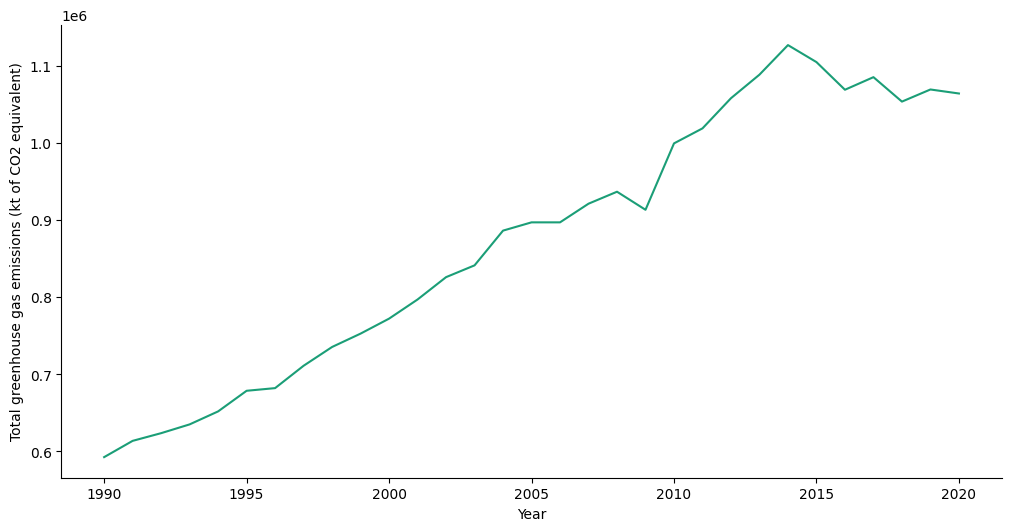

In [ ]:
# @title Year vs Total greenhouse gas emissions (kt of CO2 equivalent)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Total greenhouse gas emissions (kt of CO2 equivalent)']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_population_mf.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Total greenhouse gas emissions (kt of CO2 equivalent)')